In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
#负相关
data_neg1 = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/159745.qfq.kdj.parquet")
data_neg2 = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/159825.qfq.kdj.parquet")

In [147]:
#正相关
data_pos1 = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/516780.qfq.kdj.parquet")
data_pos2 = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/512100.qfq.kdj.parquet")

In [148]:
def calculate_kdj(df, n=9, k_period=3, d_period=3):
    # 计算最高价的 n 天最高价和最低价的 n 天最低价
    df['H_n'] = df['high'].rolling(window=n).max()
    df['L_n'] = df['low'].rolling(window=n).min()
    
    # 计算 RSV 值
    df['RSV'] = (df['close'] - df['L_n']) / (df['H_n'] - df['L_n']) * 100
    
    # 计算 K 值和 D 值
    df['K'] = df['RSV'].ewm(com=k_period-1).mean()
    df['D'] = df['K'].ewm(com=d_period-1).mean()
    
    # 计算 J 值
    df['J'] = 3 * df['K'] - 2 * df['D']
    
    # 删除中间计算的列
    df.drop(['H_n', 'L_n', 'RSV'], axis=1, inplace=True)
    df = add_kdj_choose(df)
    
    return df

def add_kdj_choose(data):

    data["k_last"] = data["K"].shift(1)
    data["k_last3"] = data["K"].shift(3)
    data["K_choose"] = "none"
    data["K_choose"][(data["k_last"] < 20) & (data["K"] >= 20) & (data["k_last3"] < 19)] = "type1"
    data["K_choose"][(data["k_last"] > 80) & (data["K"] < 80)] = "typen"
    data["K_choose"][(data["k_last"] < 50) & (data["K"] >= 50) & (data["k_last3"] < 45)]= "type2"

    data_choose = data[(data["K_choose"] !="none")]
    data_choose["K_choose_last"] = data_choose["K_choose"].shift()
    data_choose["K_choose"][(data_choose["K_choose"] == "type2") & (data_choose["K_choose_last"] == "type2")] = "type3"
    data["K_choose"] = data_choose["K_choose"]
    return data

In [149]:
data_neg1 = calculate_kdj(data_neg1, n=9*2, k_period=3*2, d_period=3*2)
data_neg2 = calculate_kdj(data_neg2, n=9*2, k_period=3*2, d_period=3*2)
data_pos1 = calculate_kdj(data_pos1, n=9*2, k_period=3*2, d_period=3*2)
data_pos2 = calculate_kdj(data_pos2, n=9*2, k_period=3*2, d_period=3*2)

/tmp/ipykernel_661817/3910123903.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["K_choose"][(data["k_last"] < 20) & (data["K"] >= 20) & (data["k_last3"] < 19)] = "type1"
/tmp/ipykernel_661817/3910123903.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["K_choose"][(data["k_last"] > 80) & (data["K"] < 80)] = "typen"
/tmp/ipykernel_661817/3910123903.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["K_choose"][

In [150]:
data = data_pos1
data["datetime"] = data["datetime"].map(str)

In [151]:
nk=0

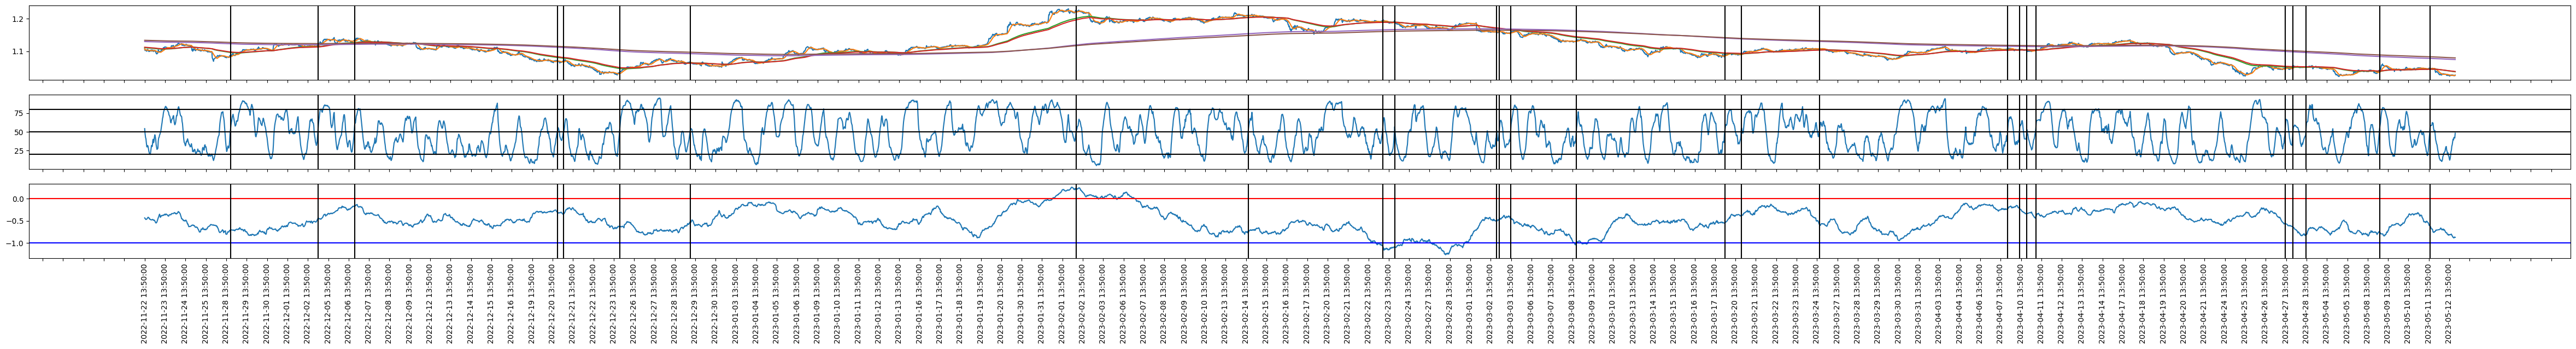

In [156]:
paras = [144, 169,  1440, 1690]
for para in paras:
    data['EMA_' + str(para)] = pd.DataFrame.ewm(data['close'], span=para).mean()


datac = data[nk:nk+6000]
nk = nk+5000
import matplotlib.ticker as ticker
# plt.xticks(rotation=90)
# plt.rcParams["figure.figsize"] = (60,6)
plt.rcParams["figure.figsize"] = (60,6)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)
# fig, ax = plt.subplots(1,1)


# df22["big_small"].rolling(48, min_periods=1).mean() 
ax1.plot(datac["datetime"], datac["close"], label=2)
ax1.plot(datac["datetime"], datac["close"].rolling(12, min_periods=1).mean(), label=2)
for para in paras[0:]:
    ax1.plot(datac["datetime"], datac['EMA_' + str(para)], label=2)
# ax1.plot(datac["datetime"], datac["close"].rolling(288, min_periods=1).mean(), label=2)
# ax1.plot(datac["datetime"], datac["close"].rolling(338, min_periods=1).mean(), label=2)
# ax.plot(datac["datetime"], datac["close"].rolling(120, min_periods=1).mean(), label=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
plt.xticks(rotation=90)



# fig, ax = plt.subplots(1,1)
ax2.plot(datac["datetime"], datac["K"], label=2)
# ax.plot(datac["datetime"], datac["D"], label=2)
# ax.plot(datac["datetime"], datac["J"], label=2)
ax2.axhline(20, color="black")
ax2.axhline(50, color="black")
ax2.axhline(80, color="black")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=48))

# ax3.plot(datac["datetime"], datac["amount_normalize20"], label=2)
ax3.plot(datac["datetime"], datac["amount_normalize20_rolling_96_mean"], label=2)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
ax3.axhline(0, color="red")
ax3.axhline(-1, color="blue")

data_choose_K3 = datac[(datac["K_choose"] == "type3" )]
for x in data_choose_K3["datetime"]:
    if x in datac["datetime"]:
        ax1.axvline(x, color="black")
        ax2.axvline(x, color="black")
        ax3.axvline(x, color="black")


In [130]:
data_choose_k3 = data_neg1[(data_neg1["K_choose"] == "type3")]

In [58]:
data_choose_k3 = data_choose_k3[data_choose_k3["amount_normalize20_rolling_96_mean"]<0]

In [59]:
data_choose_k3["amount_normalize20_rolling_96_mean"].corr(data_choose_k3["target_close2"])

0.00155236444237715

In [ ]:
data_choose_k3 = data_neg1[(data_neg1["K_choose"] == "type3")]

In [90]:
for d in [data_neg1, data_neg2, data_pos1, data_pos2]:
    data_choose_k3 = d[(d["K_choose"] == "type3")]
    data_choose_k3 = data_choose_k3[data_choose_k3["amount_normalize20_rolling_96_mean"]>0]
    print(len(data_choose_k3))
    cor = data_choose_k3["amount_normalize20_rolling_96_mean"].corr(data_choose_k3["target_close2"])
    print(cor)

4
0.5152093140976172
9
0.2566969538952146
5
0.8322922933417048
14
0.2740759920892783


In [80]:
 data["amount_normalize20_rolling_96_mean"].std()

0.2642536460229551